# Analysis of Data

## Import libraries and data

In [1]:
import pandas as pd
import geopandas as gpd
from collections import Counter
import re

In [2]:
rich_data = pd.read_pickle("data/unique_aligned_tagged.pkl")
#convert to geopandas dataframe
rich_data = gpd.GeoDataFrame(rich_data, geometry=rich_data.geometry)

## First Analysis on Professions

In [32]:
# make profession tags usable

def get_prof_list(entry):
    entry = str(entry)
    return re.findall("'([a-zA-ZÀ-ÿ]+)'", entry)

def get_prof_str(entry):
    return ", ".join(get_prof_list(entry))

rich_data["tags"] = rich_data["tags"].apply(get_prof_str)

12                                   ore, député
13               Etat, requêtes, maître, conseil
21         fabricant, confections, châles, dames
25                                     tapissier
27                                     bonnetier
                           ...                  
1051790                          parures, plumes
1051846                              antiquaires
1051929                         musique, éditeur
1051954                          cannage, sièges
1052044                         ménage, articles
Name: tags, Length: 3359249, dtype: object

In [24]:
list(rich_data["tags"].head(1))

["['ore', 'député']"]

In [20]:
# first look into profession data
Counter(rich_data["metier"])

Counter({'député de la Corse': 48,
         "maître des requêtes au conseil d'Etat": 271,
         'fab. de châles et confections pour dames': 6,
         'tapissier': 13057,
         'bonnetier': 1620,
         'avocat': 10742,
         'instit.': 69,
         'limonadier': 17317,
         'estampes': 1270,
         'fleurs raturelles': 1,
         'nécessaires': 158,
         'pap. peints': 118,
         'marquise de las Marismas': 15,
         'loueur de voitures': 3277,
         'chemises': 327,
         'dessin. en broderies': 55,
         'équip. militaire': 6,
         "pianiste de la Chapelle et de la Chambre de l'Empereur": 3,
         'graveur': 781,
         "député de l'Eure": 83,
         'rentier': 21873,
         'charcutier': 18354,
         "fab. d'éventails": 154,
         'vins': 194732,
         '159': 8,
         'corsets': 7378,
         'eaux-de-vie en gros': 100,
         'grav. sur métaux': 314,
         'vins en gros': 10492,
         'de la maison Allain oncl

In [21]:
# get only jobs with frequency in dataset higher than 50
freq_jobs = [metier for metier, count in Counter(rich_data["metier"]).items() if count>50]
print("number of frequent jobs:", len(freq_jobs))

number of frequent jobs: 3658


In [23]:
# see how many rows include frequent jobs
print("all rows:", len(rich_data))
freq_job_data = rich_data[rich_data.metier.isin(freq_jobs)]
print("only rows with frequent jobs:", len(freq_job_data))

all rows: 2966848
only rows with frequent jobs: 2329888


<AxesSubplot:xlabel='annee'>

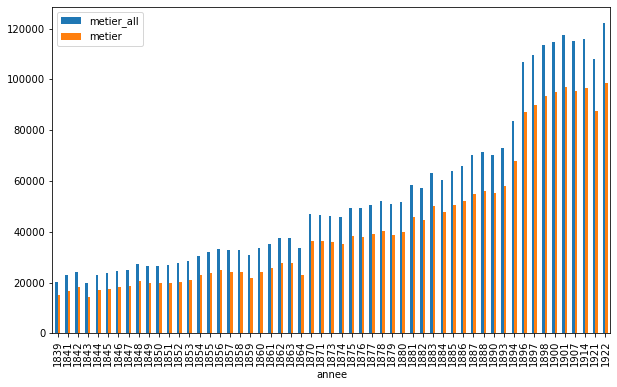

In [24]:
count_year = rich_data.groupby(by="annee").count()[["metier"]]
count_year_freq = freq_job_data.groupby(by="annee").count()[["metier"]]
both_freq = count_year.join(count_year_freq, lsuffix="_all")

# this plot shows that the omitting of jobs with frequency <50 is not affecting all years evenly
both_freq.plot.bar(y=["metier_all", "metier"], figsize=(10,6))

In [25]:
def plot_jobratio_over_time(df, top_jobnames, job_column="metier"):
    '''
    Computes the ratio top_job/all_jobs for each year in the dataframe and each job in top_jobnames
    and stores them in a new df.

    Parameters:
    ----------------
    df: dataframe with relevant data
    '''
    #get list of all years in dataframe
    all_years = sorted(df["annee"].unique())
    #instantiate empty dataframe
    df_top_jobs = pd.DataFrame(columns=top_jobnames, index=all_years)
    for year in all_years:
        year_data = df[df["annee"]==year]
        len_year = len(year_data)
        # get ratio for all jobs
        for top_job in top_jobnames:
            job_ratio = len(year_data[year_data[job_column]==top_job])/len_year
            df_top_jobs.loc[year, top_job] = job_ratio   
    return df_top_jobs    

<AxesSubplot:>

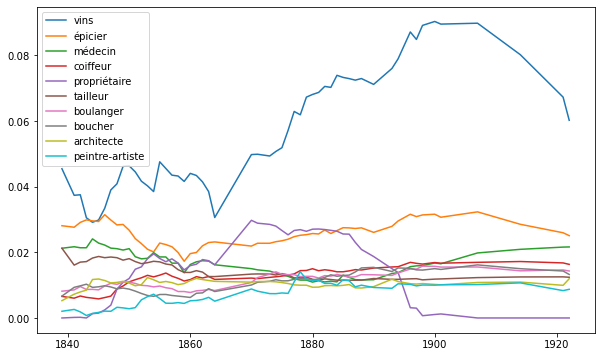

In [26]:
#get ratio of top 10 jobs in dataset
top_jobs10 = Counter(freq_job_data["metier"]).most_common(10)
top_jobnames10 = [name for name, count in top_jobs10]
plot_jobratio_over_time(rich_data, top_jobnames10).plot.line(figsize=(10,6))

<AxesSubplot:>

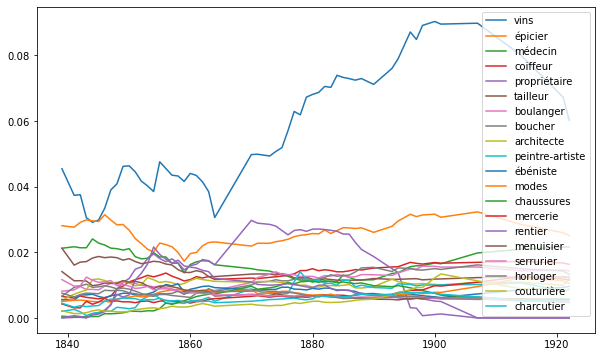

In [27]:
#get ratio of 20 top jobs in dataset
top_jobs20 = Counter(freq_job_data["metier"]).most_common(20)
top_jobnames20 = [name for name, count in top_jobs20]
plot_jobratio_over_time(rich_data, top_jobnames20).plot.line(figsize=(10,6))

## Street statistics

In [28]:
#does not work yet
'''
#can use the jobcode also to plot most frequent streets
top_streets20 = Counter(rich_data["streetname"]).most_common(20)
top_streets20 = [name for name, count in top_streets20]
plot_jobratio_over_time(rich_data, top_streets20, job_column="streetname").plot.line(figsize=(10,6))
'''

'\n#can use the jobcode also to plot most frequent streets\ntop_streets20 = Counter(rich_data["streetname"]).most_common(20)\ntop_streets20 = [name for name, count in top_streets20]\nplot_jobratio_over_time(rich_data, top_streets20, job_column="streetname").plot.line(figsize=(10,6))\n'

### Working with geodata

In [29]:
# alternative: rich_data.geometry.representative_point
rich_data["centroid"] = rich_data.geometry.centroid

In [30]:
rich_notna = rich_data.dropna()

In [31]:
horloger = rich_notna[rich_notna.metier=="horloger"]
horloger["centroid"].explore()

In [32]:
modes = rich_notna[rich_notna.metier=="modes"]
modes["centroid"].explore()